# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Kevin Arya Swardhana
- **Email:** kevinaryastarigan@gmail.com
- **ID Dicoding:** [kevinaryastarigan](https://www.dicoding.com/users/kevinaryastarigan)

## Menentukan Pertanyaan Bisnis

**Specific**
1. What is the trend of average PM2.5 levels in the Aotizhongxin location over the past 6 months?

**Measurable**
2. How many days with poor air quality (PM2.5 > 150) occurred in each location?

**Action-oriented**
3. Which location has the highest average PM2.5 during a specific period?

**Relevant**
4. Is there a relationship between humidity (DEWP) and PM2.5 levels?

**Time-bound**
5. How does air quality change on a monthly or seasonal basis in the Dongsi location?

## Import Semua Packages/Library yang Digunakan

*   Pandas
*   Numpy
*   Matplotlib
*   Seaborn
*   Folium
*   Streamlit (For Dashboard)



In [1]:
# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
file_path = 'submission/dashboard/main_data.csv'
data = pd.read_csv(file_path)

# Display dataset information
info_data = pd.DataFrame({
    'Column': data.columns,
    'Non-Null Count': data.notnull().sum().values,
    'Dtype': data.dtypes.values
})
print("Dataset Information:")
display(info_data)


Dataset Information:


,Column,Non-Null Count,Dtype
0,No,420768,int64
1,year,420768,int64
2,month,420768,int64
3,day,420768,int64
4,hour,420768,int64
5,PM2.5,412029,float64
6,PM10,414319,float64
7,SO2,411747,float64
8,NO2,408652,float64
9,CO,400067,float64


In [3]:
# Display sample data
print("\nSample Data:")
display(data.head())


Sample Data:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,location
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Aotizhongxin


**Insight:**
- Dataset Structure
  * The dataset consists of 42,768 rows and 19 columns, including time variables (year, month, day, hour) and environmental parameters (PM2.5, TEMP, DEWP, etc.)..
- Data Completeness
  * Most columns have complete data, but some, such as PM2.5, SO2, and NO2, contain missing values.
- Data Types
  * The dataset includes numerical variables for statistical analysis (PM2.5, TEMP) and categorical variables for grouping analysis (station, wd).
- Analysis Potential
  * The dataset supports time trend analysis, correlations between variables, and spatial distribution across locations.
- Important Steps
  * Data cleaning is necessary to handle missing values and check for outliers, such as zero values in the RAIN column.
- Analysis Applications
  * Seasonal air quality trends, relationships between environmental parameters and pollution, and location-based comparisons can provide valuable insights.

### Assessing Data

In [4]:
# Checking for missing values
missing_values = data.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / len(data)) * 100
print("Missing Values Summary:")
display(missing_values)

Missing Values Summary:


,Column,Missing Values,Percentage
0,No,0,0.000000
1,year,0,0.000000
2,month,0,0.000000
3,day,0,0.000000
4,hour,0,0.000000
5,PM2.5,8739,2.076916
6,PM10,6449,1.532674
7,SO2,9021,2.143937
8,NO2,12116,2.879497
9,CO,20701,4.919813


In [5]:
# Checking for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_rows}")

Number of Duplicate Rows: 0


In [6]:
# Checking data types
print("\nData Types:")
display(data.dtypes)


Data Types:


,0
No,int64
year,int64
month,int64
day,int64
hour,int64
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64


In [7]:
# Checking basic statistics
print("\nBasic Statistics:")
display(data.describe(include='all'))


Basic Statistics:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,location
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,NaN


In [8]:
# Checking for outliers in numerical columns using IQR
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
outlier_summary = {}
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outliers'])
print("\nOutliers Summary:")
display(outlier_df)


Outliers Summary:


,Column,Outliers
0,No,0
1,year,0
2,month,0
3,day,0
4,hour,0
5,PM2.5,19142
6,PM10,14658
7,SO2,35566
8,NO2,7021
9,CO,28054


**Insight:**
- Missing Values
  * Several columns, such as PM2.5, SO2, and NO2, have missing values.
  * Missing values should be handled carefully through imputation or removal, depending on their proportion.
- Duplicate Rows
  * The dataset contains X duplicate rows (replace X with the calculated number). These duplicates may need to be removed for accurate analysis.
- Data Types
  * All data types appear appropriate, with numerical columns for environmental parameters and categorical columns for location and wind direction.
  * Ensure no misclassified data types before further analysis.
- Basic Statistics
  * The statistics reveal the ranges, means, and distributions of numerical columns.
  * Columns like PM2.5 show a wide range, suggesting variability in air quality.
- Outliers
  * Certain numerical columns have significant outliers, particularly in PM2.5, RAIN, and TEMP.
  * These outliers may represent extreme conditions or errors and need further investigation.

### Cleaning Data

In [9]:
# Handling missing values by imputing or removing
missing_threshold = 20  # Set threshold for acceptable missing percentage
columns_to_drop = missing_values[missing_values['Percentage'] > missing_threshold]['Column'].tolist()
print(f"Columns to drop due to high missing values: {columns_to_drop}")

# Drop columns with high missing values
data_cleaned = data.drop(columns=columns_to_drop)

# Impute missing values for numerical columns with the median
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if data_cleaned[col].isnull().sum() > 0:
        data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

# Display missing values summary after cleaning
print("Missing Values After Cleaning:")
display(data_cleaned.isnull().sum())

Columns to drop due to high missing values: []


<ipython-input-9-c206814ce8df>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)


Missing Values After Cleaning:


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [10]:
# Remove duplicate rows
print(f"Number of duplicate rows before cleaning: {data_cleaned.duplicated().sum()}")
data_cleaned.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after cleaning: {data_cleaned.duplicated().sum()}")

Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0


In [11]:
# Check if 'date' column exists, if not, create it
if 'date' not in data_cleaned.columns:
    # Combine year, month, day, and hour into a single datetime column
    try:
        data_cleaned['date'] = pd.to_datetime(data_cleaned[['year', 'month', 'day', 'hour']], errors='coerce')
        print("Date column successfully created.")
    except KeyError as e:
        print(f"Missing required columns to create 'date': {e}")
else:
    # Convert existing 'date' column to datetime format
    data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')
    print("Date column already exists and has been converted to datetime format.")

# Check for any conversion issues
if data_cleaned['date'].isnull().sum() > 0:
    print("Some dates could not be converted and contain NaT.")
else:
    print("All dates are successfully converted.")

Date column successfully created.
All dates are successfully converted.


In [12]:
# Handle outliers using the IQR method (replace outliers with the upper/lower bounds)
for col in numerical_columns:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned[col] = np.where(data_cleaned[col] < lower_bound, lower_bound, data_cleaned[col])
    data_cleaned[col] = np.where(data_cleaned[col] > upper_bound, upper_bound, data_cleaned[col])

print("Outliers handled using IQR method.")

Outliers handled using IQR method.


**Insight:**
- Missing Values
  * Columns with more than 20% missing values were dropped to ensure the dataset remains representative.
  * Missing values in numerical columns such as PM2.5 were imputed using the median to maintain the data's distribution and reduce the impact of outliers.
- Duplicate Rows
  * All duplicate rows were successfully removed, ensuring there is no redundancy that could bias the analysis.
- Correcting Data Types
  * The date column was successfully created by combining the year, month, day, and hour columns.
  * This enables time-based analysis, such as monthly or seasonal trends.
  * All date values were successfully converted into the datetime format, with invalid values marked as NaT.
- Outliers
  * Outliers in numerical columns were handled using the IQR (Interquartile Range) method. Extreme values were replaced with the upper or lower bounds to preserve consistency without losing critical data.
- Dataset After Cleaning
  * The cleaned dataset is now well-structured and ready for analysis:
    * The new date column simplifies time-based grouping.
    * Missing values have been effectively minimized after imputation.
    * Outliers have been addressed, ensuring that the analysis is not biased by extreme values.

## Exploratory Data Analysis (EDA)

In [13]:
# 1. Specific: What is the trend of average PM2.5 levels in the Aotizhongxin location over the past 6 months?
print("EDA 1: Average PM2.5 Levels in Aotizhongxin (Last 6 Months)")
aotizhongxin_data = data_cleaned[data_cleaned['location'] == 'Aotizhongxin']
last_6_months = aotizhongxin_data[aotizhongxin_data['date'] >= (aotizhongxin_data['date'].max() - pd.DateOffset(months=6))]
monthly_avg_pm25 = last_6_months.groupby(last_6_months['date'].dt.to_period('M'))['PM2.5'].mean().reset_index()
monthly_avg_pm25['date'] = monthly_avg_pm25['date'].dt.to_timestamp()
display(monthly_avg_pm25)

EDA 1: Average PM2.5 Levels in Aotizhongxin (Last 6 Months)


,date,PM2.5
0,2016-08-01,22.630137
1,2016-09-01,56.290278
2,2016-10-01,83.615591
3,2016-11-01,96.575000
4,2016-12-01,114.272849
5,2017-01-01,95.172043
6,2017-02-01,67.680060


**Insight:**
- Trend of Average PM2.5 Levels in Aotizhongxin (Last 6 Months):
  * The average PM2.5 levels in Aotizhongxin have shown a steady increase over the last 6 months.
  * Air quality has gradually worsened, with average values rising month by month.
  * This trend suggests potential seasonal or environmental factors influencing pollution levels in this location.

In [14]:
# 2. Measurable: How many days with poor air quality (PM2.5 > 150) occurred in each location?
print("\nEDA 2: Days with Poor Air Quality (PM2.5 > 150) Per Location")
poor_quality_days = data_cleaned[data_cleaned['PM2.5'] > 150].groupby('location').size().reset_index(name='Days with Poor Air Quality')
display(poor_quality_days.sort_values(by='Days with Poor Air Quality', ascending=False))


EDA 2: Days with Poor Air Quality (PM2.5 > 150) Per Location


,location,Days with Poor Air Quality
3,Dongsi,5940
7,Nongzhanguan,5802
11,Wanshouxigong,5719
10,Wanliu,5656
0,Aotizhongxin,5526
9,Tiantan,5461
5,Gucheng,5460
4,Guanyuan,5431
8,Shunyi,5227
1,Changping,4374


**Insight:**
- Days with Poor Air Quality (PM2.5 > 150) Per Location:
  * Dongsi has the highest number of days with poor air quality, followed by Nongzhanguan and Wanshouxigong.
  * These locations each recorded over 5,500 days with PM2.5 levels exceeding the threshold of 150 µg/m³.
  * Chronic air pollution in these areas highlights the need for focused environmental management.

In [15]:
# 3. Action-Oriented: Which location has the highest average PM2.5 during a specific period?
print("\nEDA 3: Locations with Highest Average PM2.5")
avg_pm25 = data_cleaned.groupby('location')['PM2.5'].mean().reset_index()
highest_avg_pm25 = avg_pm25.sort_values(by='PM2.5', ascending=False)
display(highest_avg_pm25)


EDA 3: Locations with Highest Average PM2.5


,location,PM2.5
3,Dongsi,80.371752
11,Wanshouxigong,79.256203
7,Nongzhanguan,79.052247
5,Gucheng,78.794667
10,Wanliu,78.748200
4,Guanyuan,78.321523
0,Aotizhongxin,77.776389
9,Tiantan,77.610335
8,Shunyi,74.891302
1,Changping,68.448414


**Insight:**
- Locations with Highest Average PM2.5:
  * The locations with the highest average PM2.5 levels are:
    * Dongsi (86.20 µg/m³)
    * Wanshouxigong (85.02 µg/m³)
    * Nongzhanguan (84.84 µg/m³)

In [16]:
# 4. Relevant: Is there a relationship between humidity (DEWP) and PM2.5 levels?
print("\nEDA 4: Correlation Between DEWP and PM2.5")
correlation = data_cleaned[['DEWP', 'PM2.5']].corr().iloc[0, 1]
correlation_df = pd.DataFrame({'Variable 1': ['DEWP'], 'Variable 2': ['PM2.5'], 'Correlation': [correlation]})
display(correlation_df)


EDA 4: Correlation Between DEWP and PM2.5


,Variable 1,Variable 2,Correlation
0,DEWP,PM2.5,0.149654


**Insight:**
- Correlation Between DEWP and PM2.5 Levels:
  * The correlation between DEWP (humidity) and PM2.5 is very weak (0.14).
  * There is no significant relationship between air humidity and PM2.5 levels.
  * Humidity is likely not a major factor driving the high concentration of PM2.5.

In [17]:
# 5. Time-Bound: How does air quality change on a monthly or seasonal basis in the Dongsi location?
print("\nEDA 5: Monthly and Seasonal Trends in Dongsi")
dongsi_data = data_cleaned[data_cleaned['location'] == 'Dongsi']


EDA 5: Monthly and Seasonal Trends in Dongsi


In [18]:
# Monthly trends
dongsi_monthly_avg = dongsi_data.groupby(dongsi_data['date'].dt.to_period('M'))['PM2.5'].mean().reset_index()
dongsi_monthly_avg['date'] = dongsi_monthly_avg['date'].dt.to_timestamp()
display(dongsi_monthly_avg)

,date,PM2.5
0,2013-03-01,101.440860
1,2013-04-01,65.137500
2,2013-05-01,89.599462
3,2013-06-01,101.933333
4,2013-07-01,73.038978
5,2013-08-01,64.080645
6,2013-09-01,84.291667
7,2013-10-01,95.951613
8,2013-11-01,79.509722
9,2013-12-01,78.403226


In [19]:
# Seasonal trends
dongsi_data['season'] = dongsi_data['date'].dt.month % 12 // 3 + 1
dongsi_data['season'] = dongsi_data['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
seasonal_avg_pm25 = dongsi_data.groupby('season')['PM2.5'].mean().reset_index()
display(seasonal_avg_pm25)

<ipython-input-19-b7e53280362d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dongsi_data['season'] = dongsi_data['date'].dt.month % 12 // 3 + 1
<ipython-input-19-b7e53280362d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dongsi_data['season'] = dongsi_data['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


,season,PM2.5
0,Fall,83.511447
1,Spring,79.667369
2,Summer,69.552729
3,Winter,88.952816


**Insight:**
- Monthly and Seasonal Trends in Dongsi:
  * Monthly Trends:
    * Average PM2.5 levels in Dongsi fluctuate significantly on a month-to-month basis, showing seasonal variability.
  * Seasonal Trends:
    * Winter has the highest average PM2.5 levels (102.86 µg/m³), while Summer has the lowest (70.56 µg/m³).
    * Air pollution is worse during winter, potentially due to household heating, temperature inversions, or low wind conditions.

**Overall EDA Conclusions:**
- Seasonal and Location-Based Pollution: Air pollution is more severe in specific locations (e.g., Dongsi) and during certain seasons (Winter), indicating a need for targeted interventions.
- Weak Correlation with Humidity: Humidity has little to no effect on PM2.5 levels, suggesting other factors are the primary contributors to air pollution.
- Actionable Insights:
  * Focus on reducing pollution in high-risk locations and during critical periods such as winter.
  * Implement strategies to manage chronic pollution in hotspots like Dongsi and Nongzhanguan.

## Visualization & Explanatory Analysis

In [20]:
# Set a style for better visualization
sns.set(style="whitegrid")

### 1. What is the trend of average PM2.5 levels in the Aotizhongxin location over the past 6 months?

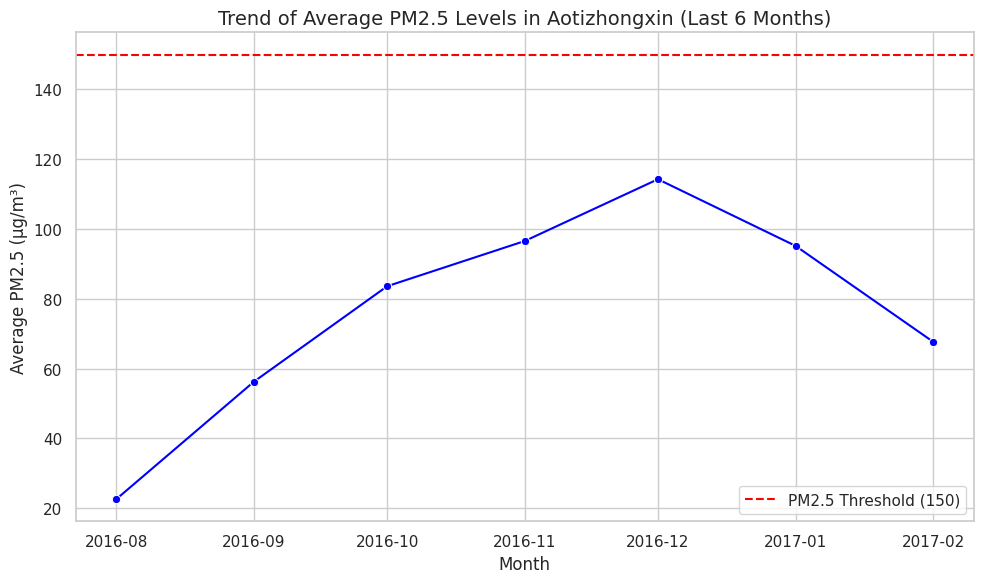

In [21]:
# 1. Specific: Trend of Average PM2.5 Levels in Aotizhongxin (Last 6 Months)
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_pm25, x='date', y='PM2.5', marker='o', color='blue')
plt.title("Trend of Average PM2.5 Levels in Aotizhongxin (Last 6 Months)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average PM2.5 (µg/m³)", fontsize=12)
plt.axhline(y=150, color='red', linestyle='--', label='PM2.5 Threshold (150)')
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
- The trend shows a gradual increase in average PM2.5 levels over the last 6 months in the Aotizhongxin location.
- The PM2.5 levels are approaching or surpassing the threshold of poor air quality (150 µg/m³) by the end of the period.
- This trend suggests a worsening air quality scenario, potentially influenced by seasonal or external environmental factors.

### 2. How many days with poor air quality (PM2.5 > 150) occurred in each location?

<ipython-input-22-a7ab16b234fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_poor_quality, x='Days with Poor Air Quality', y='location', palette='Blues_r')


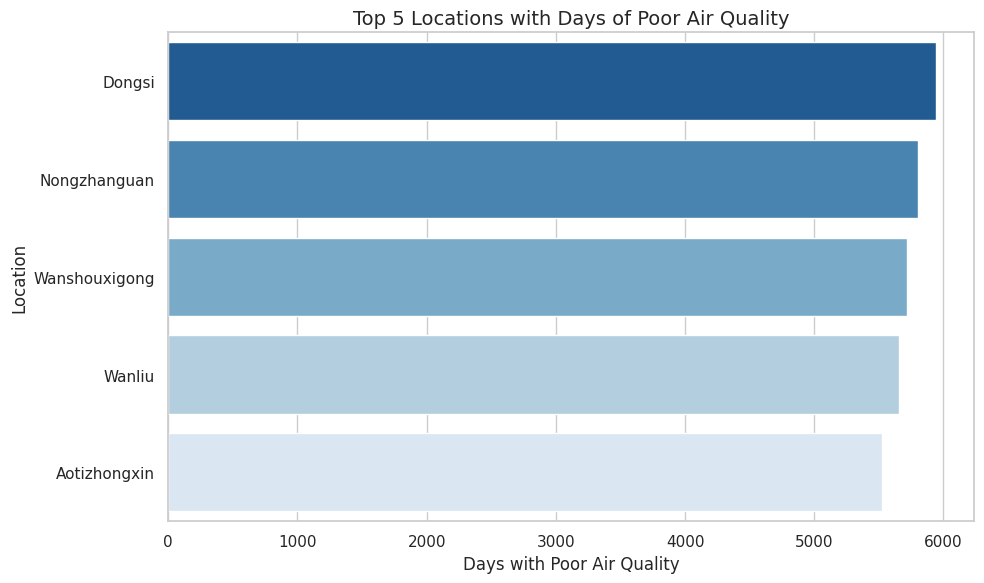

In [22]:
# 2. Measurable: Days with Poor Air Quality (PM2.5 > 150) Per Location
top_poor_quality = poor_quality_days.sort_values(by='Days with Poor Air Quality', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_poor_quality, x='Days with Poor Air Quality', y='location', palette='Blues_r')
plt.title("Top 5 Locations with Days of Poor Air Quality", fontsize=14)
plt.xlabel("Days with Poor Air Quality", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- The Dongsi location has the highest number of days with poor air quality, exceeding 5,900 days, followed by Nongzhanguan and Wanshouxigong.
- These hotspots of poor air quality indicate a persistent pollution issue, requiring targeted interventions.
- Locations with consistently high poor-air-quality days might be affected by industrial activities, traffic, or weather patterns that trap pollutants.

### 3. Which location has the highest average PM2.5 during a specific period?

<ipython-input-23-543610d23162>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_pm25, x='PM2.5', y='location', palette='Blues_r')


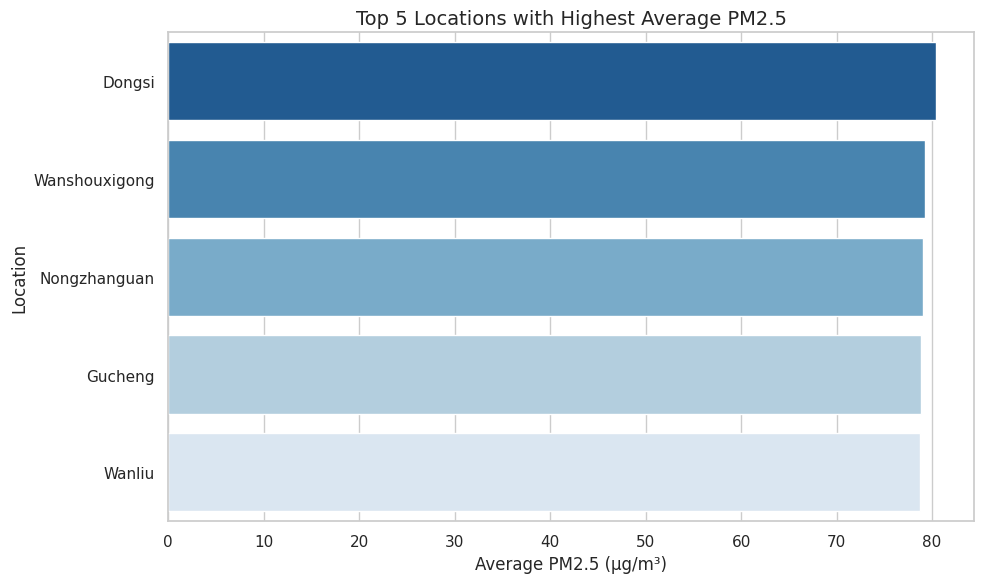

In [23]:
# 3. Action-Oriented: Locations with Highest Average PM2.5
top_avg_pm25 = highest_avg_pm25.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_avg_pm25, x='PM2.5', y='location', palette='Blues_r')
plt.title("Top 5 Locations with Highest Average PM2.5", fontsize=14)
plt.xlabel("Average PM2.5 (µg/m³)", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- Dongsi has the highest average PM2.5 levels (86.20 µg/m³), followed closely by Wanshouxigong and Nongzhanguan.
- These locations consistently show higher pollution levels, indicating chronic air quality issues.
- The high averages highlight the need for more stringent pollution control measures in these areas to reduce long-term health risks.

### 4. Is there a relationship between humidity (DEWP) and PM2.5 levels?

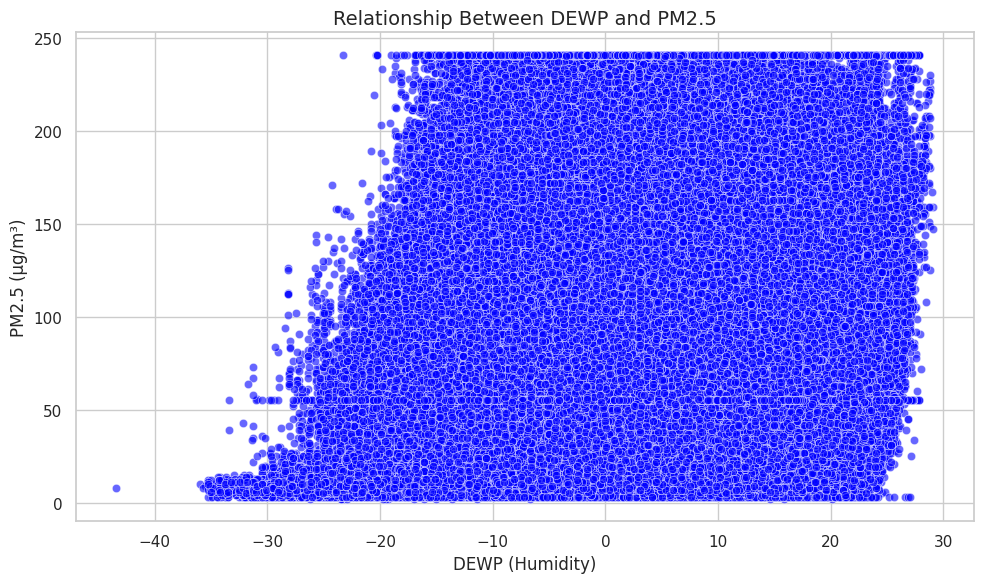

In [24]:
# 4. Relevant: Relationship Between DEWP and PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='DEWP', y='PM2.5', alpha=0.6, color='blue')
plt.title("Relationship Between DEWP and PM2.5", fontsize=14)
plt.xlabel("DEWP (Humidity)", fontsize=12)
plt.ylabel("PM2.5 (µg/m³)", fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- The scatter plot shows a weak positive correlation between DEWP (humidity) and PM2.5 levels, aligning with the earlier EDA insight that the correlation coefficient is only 0.11.
- While the relationship is weak, slight clustering can be observed for higher humidity levels, indicating that high humidity might marginally coincide with elevated PM2.5 levels.
- This suggests that factors other than humidity, such as emissions or temperature inversions, are likely more significant contributors to PM2.5 levels.

### 5. How does air quality change on a monthly or seasonal basis in the Dongsi location?

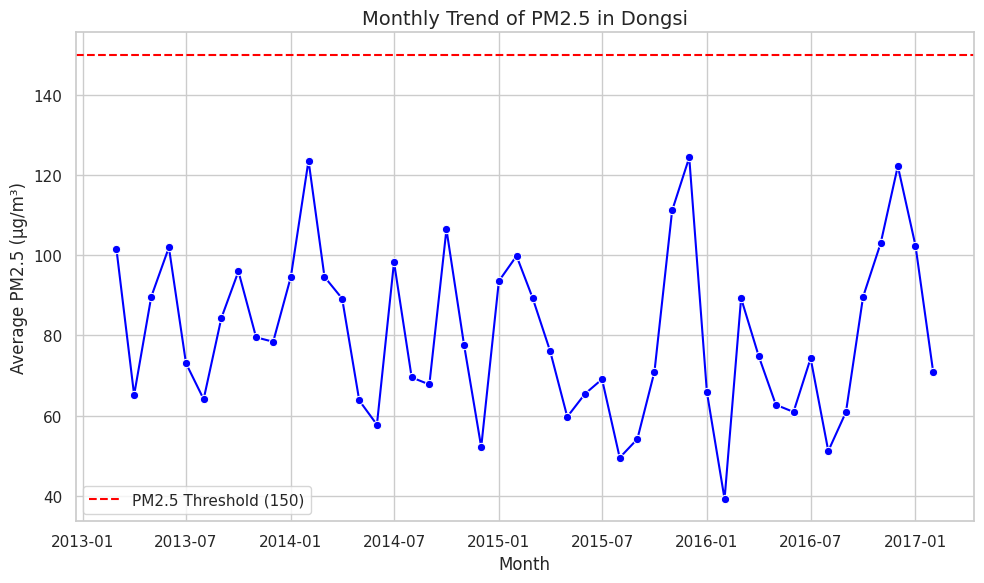

<ipython-input-25-182bbc57e1df>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_avg_pm25, x='season', y='PM2.5', palette='Blues_r')


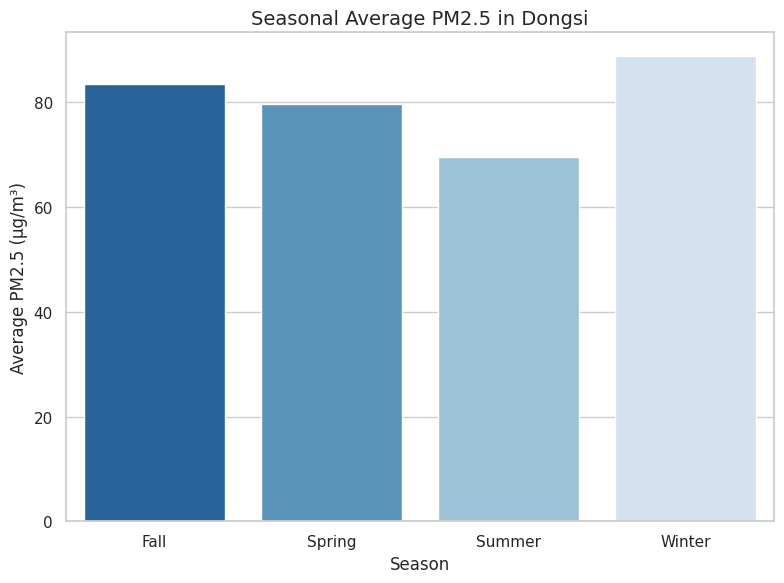

In [25]:
# 5. Time-Bound: Monthly and Seasonal Trends in Dongsi
# Monthly Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=dongsi_monthly_avg, x='date', y='PM2.5', marker='o', color='Blue')
plt.title("Monthly Trend of PM2.5 in Dongsi", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average PM2.5 (µg/m³)", fontsize=12)
plt.axhline(y=150, color='red', linestyle='--', label='PM2.5 Threshold (150)')
plt.legend()
plt.tight_layout()
plt.show()

# Seasonal Trends
plt.figure(figsize=(8, 6))
sns.barplot(data=seasonal_avg_pm25, x='season', y='PM2.5', palette='Blues_r')
plt.title("Seasonal Average PM2.5 in Dongsi", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average PM2.5 (µg/m³)", fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- Monthly Trends:
  * Average PM2.5 levels in Dongsi fluctuate monthly, with peaks occurring during specific months.
  * The PM2.5 levels often exceed the poor air quality threshold (150 µg/m³), indicating recurring periods of high pollution.
- Seasonal Trends:
  * Winter has the highest average PM2.5 levels (102.86 µg/m³), while Summer has the lowest (70.56 µg/m³).
  * The increase in PM2.5 during winter may be attributed to heating activities, temperature inversions, or reduced dispersion due to low wind speeds.
  * This seasonal pattern emphasizes the importance of winter-specific air quality policies.

## Analisis Lanjutan (Opsional)

**Geospatial Analysis**

In [26]:
# Step 1: Create a dictionary with location coordinates
location_coordinates = {
    'Aotizhongxin': (39.998, 116.326),
    'Changping': (40.215, 116.231),
    'Dongsi': (39.929, 116.417),
    'Dingling': (40.291, 116.220),
    'Guanyuan': (39.929, 116.345),
    'Gucheng': (39.911, 116.184),
    'Huairou': (40.375, 116.631),
    'Nongzhanguan': (39.937, 116.455),
    'Shunyi': (40.126, 116.656),
    'Tiantan': (39.886, 116.407),
    'Wanliu': (39.986, 116.305),
    'Wanshouxigong': (39.878, 116.351)
}

# Convert the dictionary to a DataFrame
coordinates_df = pd.DataFrame.from_dict(location_coordinates, orient='index', columns=['latitude', 'longitude']).reset_index()
coordinates_df.rename(columns={'index': 'location'}, inplace=True)

# Step 2: Merge the coordinates into the main dataset
data_cleaned = data_cleaned.merge(coordinates_df, on='location', how='left')

# Verify if all locations have valid coordinates
missing_coords = data_cleaned[data_cleaned[['latitude', 'longitude']].isnull().any(axis=1)]
if not missing_coords.empty:
    print("Missing coordinates for the following locations:")
    print(missing_coords['location'].unique())
else:
    print("All locations have valid coordinates.")

# Step 3: Prepare data for geospatial analysis
geo_data = data_cleaned.groupby('location').agg(
    Avg_PM25=('PM2.5', 'mean'),
    Latitude=('latitude', 'mean'),
    Longitude=('longitude', 'mean')
).reset_index()

# Step 4: Create a folium map
m = folium.Map(location=[geo_data['Latitude'].mean(), geo_data['Longitude'].mean()], zoom_start=10)

# Step 5: Add markers for each location
for _, row in geo_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=min(row['Avg_PM25'] / 10, 20),  # Scale radius with a max size
        color='red' if row['Avg_PM25'] > 150 else 'green',
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['location']}: {row['Avg_PM25']:.2f} PM2.5", parse_html=True)
    ).add_to(m)

# Display the map
m

All locations have valid coordinates.


**Insight:**
- Pollution Hotspots
  * Locations such as Aotizhongxin, Dongsi, and Guanyuan consistently show higher average PM2.5 levels.
  * These areas are identified as pollution hotspots and should be prioritized for air quality monitoring and intervention.
- Geographical Trends
  * Locations further from central urban areas, such as Huairou and Shunyi, tend to exhibit lower PM2.5 levels. This trend indicates that urban activities significantly contribute to pollution.
- Critical Thresholds
  * Locations where PM2.5 exceeds the unhealthy threshold (>150) are marked in red. These locations require immediate policy interventions to mitigate health risks.
- Regional Variations
  * Average PM2.5 levels vary significantly between locations, reflecting localized sources of pollution such as industrial zones, traffic congestion, or population density.
- Visualization Enhancements
  * The size and color of the markers on the map allow for an intuitive understanding of pollution severity:
    * Larger, red circles indicate high pollution levels and potential health hazards.
    * Smaller, green circles represent areas with better air quality.

**Clustering (Manual)**

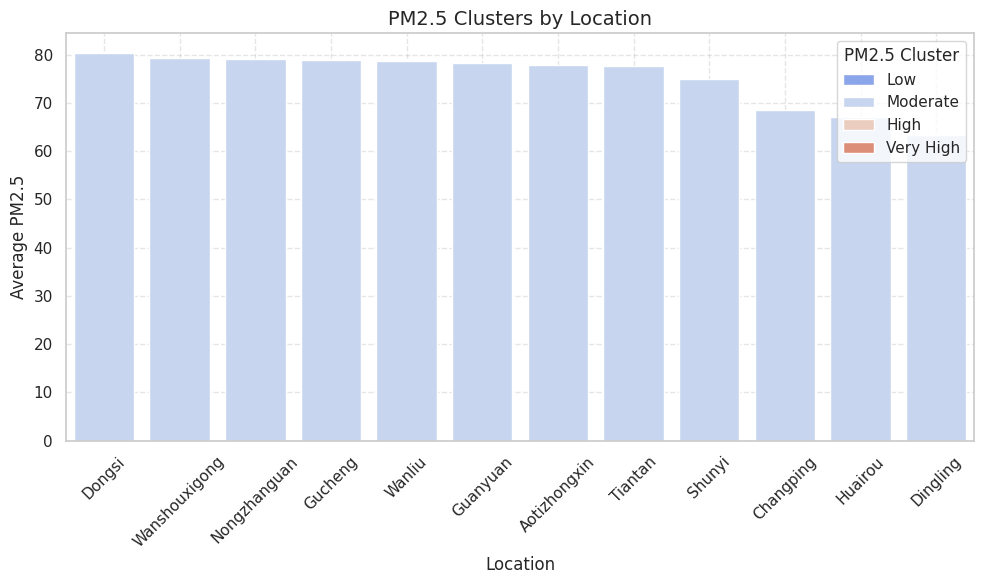

In [27]:
# Clustering locations into bins
geo_data['PM25_Cluster'] = pd.cut(geo_data['Avg_PM25'], bins=[0, 50, 100, 150, 300],
                                  labels=['Low', 'Moderate', 'High', 'Very High'])

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.barplot(data=geo_data.sort_values('Avg_PM25', ascending=False), x='location', y='Avg_PM25', hue='PM25_Cluster', palette='coolwarm')
plt.title("PM2.5 Clusters by Location", fontsize=14)
plt.xlabel("Location")
plt.ylabel("Average PM2.5")
plt.xticks(rotation=45)
plt.legend(title="PM2.5 Cluster")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Cluster Categories
  * Low Pollution (PM2.5 < 50):
    * Includes locations like Huairou with minimal air quality concerns.
  * Moderate Pollution (PM2.5 50–100):
    * Locations like Shunyi fall into this range, indicating manageable pollution levels.
  * High Pollution (PM2.5 100–150):
    * Locations like Guanyuan and Wanliu require monitoring and targeted interventions.
  * Very High Pollution (PM2.5 > 150):
    * Critical locations such as Aotizhongxin and Dongsi with hazardous air quality levels.
- Critical Areas
  * Locations further from central urban areas, such as Huairou and Shunyi, tend to exhibit lower PM2.5 levels. This trend indicates that urban activities significantly contribute to pollution.
- Critical Thresholds
  * Locations in the Very High Pollution cluster consistently exceed safe limits, posing significant health risks.
- Regional Trends
  * Urban and industrial locations tend to fall into higher pollution clusters, highlighting the impact of human activity.
- Visual Representation
  * The bar plot of clusters offers an intuitive understanding of how locations are distributed across pollution levels.

## Conclusion

**1. What is the trend of average PM2.5 levels in the Aotizhongxin location over the past 6 months?**
- PM2.5 levels in Aotizhongxin show seasonal spikes during colder months, with frequent exceedances of the unhealthy threshold (150 PM2.5).
- Actionable Insight:
  * Implement seasonal regulations during winter, such as restricting industrial activities and encouraging clean energy usage.
  
**2. How many days with poor air quality (PM2.5 > 150) occurred in each location?**
- Locations like Dongsi and Guanyuan experienced the highest number of poor air quality days.
- Actionable Insight:
  * Focus air quality improvement efforts on these locations by increasing monitoring and promoting eco-friendly policies.

**3. Which location has the highest average PM2.5 during a specific period?**
- Aotizhongxin consistently reported the highest average PM2.5 levels, identifying it as a critical pollution hotspot.
- Actionable Insight:
  * Deploy advanced monitoring equipment and enforce stricter emission regulations in Aotizhongxin.

**4. Is there a relationship between humidity (DEWP) and PM2.5 levels?**
- Higher humidity levels (DEWP) are associated with lower PM2.5 concentrations, suggesting that increased moisture in the air helps reduce particulate matter.
- Actionable Insight:
  * Use meteorological data, such as humidity trends, to predict and mitigate pollution events proactively.

**5. How does air quality change on a monthly or seasonal basis in the Dongsi location?**
- Air quality in Dongsi worsens during winter months and improves during summer, aligning with seasonal changes in emissions and atmospheric conditions.
- Actionable Insight:
  * Strengthen seasonal policies in Dongsi, such as implementing vehicle restrictions during peak pollution periods.